In [1]:
print ( "hello world" )

hello world


first step importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2 . importing the stock data directly from the website

In [3]:
start = '2014-01-1'
end = '2024-10-01'

stock = 'GOOG'
data = yf.download(stock, start ,end )


[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2014-01-02 00:00:00+00:00,27.656164,27.724083,27.839401,27.603037,27.782366,73129082
2014-01-03 00:00:00+00:00,27.454418,27.521841,27.818977,27.520098,27.770908,66917888
2014-01-06 00:00:00+00:00,27.760517,27.828691,27.867046,27.557707,27.721344,71037271
2014-01-07 00:00:00+00:00,28.295691,28.365179,28.385853,27.924334,28.019974,102486711
2014-01-08 00:00:00+00:00,28.354576,28.424210,28.575891,28.226450,28.543015,90036218
...,...,...,...,...,...,...
2024-09-24 00:00:00+00:00,163.639999,163.639999,164.550003,162.029999,164.250000,18774100
2024-09-25 00:00:00+00:00,162.990005,162.990005,164.216995,162.774994,162.970001,13607900


finding the moving average by analyzing the past data   

In [5]:
 ma_100_days = data.Close.rolling(100).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


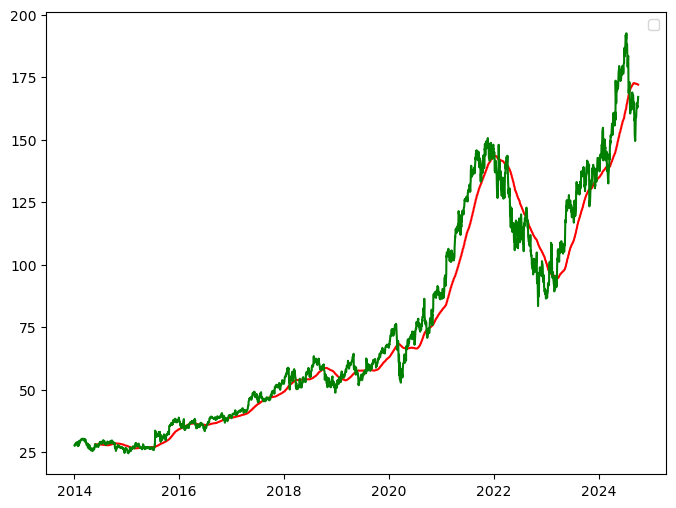

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g')
plt.legend()
plt.show()

here the moving average indicates the green colour
the closing price indicates the red colour

In [7]:
ma_200_days = data.Close.rolling (200).mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


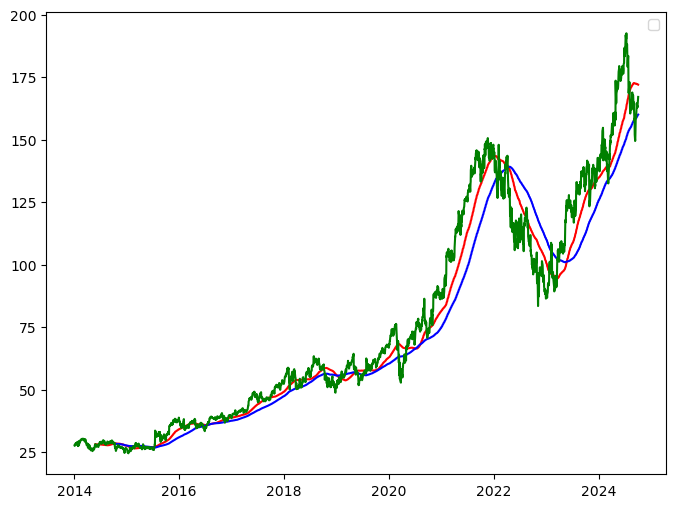

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.legend()
plt.show()

In [9]:
data.dropna(inplace=True)

if there are any null values we can get rid of that or any missing values then that particular data will be deleted

Now we are splitting the data into the two equal parts as the Train and Test data we actually have 2718 rows now after splitting in Train data we have 2174 Rows and in Test data we have 544 Rows

In [10]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape[0]

2163

In [12]:
data_test.shape[0]

541

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []



for i in range (100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [16]:
x,y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units= 50,activation = 'relu' , return_sequences = True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

d:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size = 32,verbose = 1)


Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 61s 398ms/step - loss: 0.0584
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 388ms/step - loss: 0.0067
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 387ms/step - loss: 0.0092
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 403ms/step - loss: 0.0053
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 32s 499ms/step - loss: 0.0050
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 31s 479ms/step - loss: 0.0048
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 421ms/step - loss: 0.0045
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 393ms/step - loss: 0.0045
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 416ms/step - loss: 0.0038
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 415ms/step - loss: 0.0037
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 380ms/step - loss: 0.0037
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 43s 413ms/step - loss: 0.0038
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 402ms/step - loss: 0.0039
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 380ms/step - loss: 0.0038
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test],ignore_index=True)

In [24]:
data_test_scale = scaler.fit_transform(data_test)

In [25]:
x_test = []
y_test = []



for i in range (100,  data_test_scale.shape[0]):
  x_test.append(data_test_scale[i-100:i])
  y_test.append(data_test_scale[i,0])
x_test, y_test = np.array(x_test), np.array(y_test)

In [26]:
y_predict= model.predict(x_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step


In [27]:
scale =1/scaler.scale_[0]

In [28]:
y_predict= y_predict*scale
y_test = y_test*scale

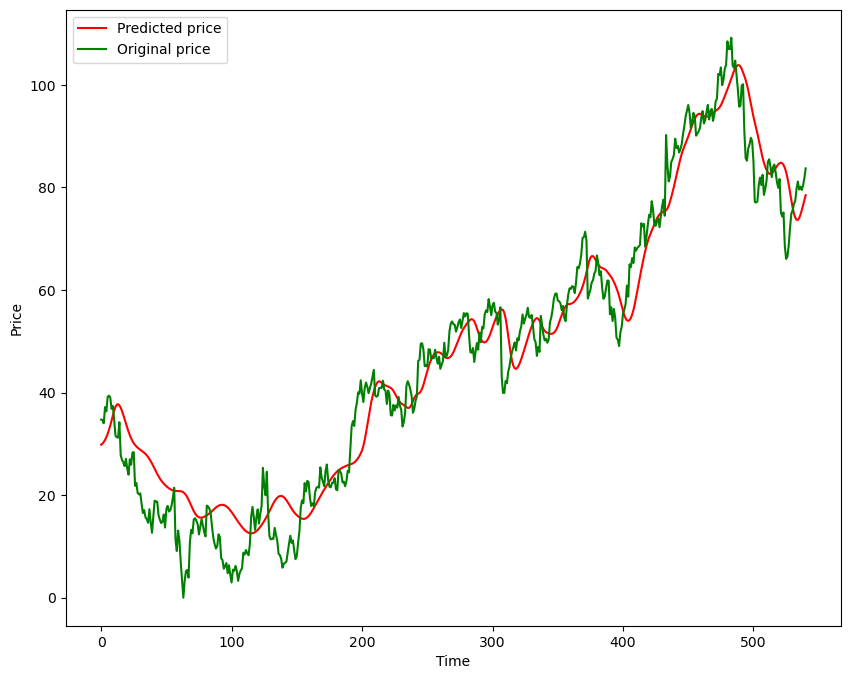

In [29]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label = 'Predicted price')
plt.plot(y_test,'g',label= 'Original price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [31]:

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 41.59128327554664
Root Mean Squared Error (RMSE): 6.449130427859762
Mean Absolute Error (MAE): 5.1833452358704175
R-squared (R²): 0.9459608134012909


In [32]:
# Calculate and print accuracy
accuracy = r2 * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 94.60%
